In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


train=pd.read_csv("train.csv")
train['Gender']=train.Gender.map({'Male':0,'Female':1})
train['Vehicle_Age']=train.Vehicle_Age.map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
train['Vehicle_Damage']=train.Vehicle_Damage.map({'No':0,'Yes':1})
print(train)
train.isnull().any()


            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response
0            0       0   27              1.0         46.0                   1            0               0         33138.0                 152.0      223         0
1            1       1   44              1.0         28.0                   0            2               1         60529.0                  26.0      158         1
2            2       0   52              1.0         46.0                   0            2               1         22476.0                 124.0      226         1
3            3       0   23              1.0         46.0                   1            0               0          2630.0                 152.0      163         0
4            4       1   43              1.0         28.0                   0            1               1         32543.0                 124.0       56         1
...        ...  

id                      False
Gender                  False
Age                     False
Driving_License          True
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel     True
Vintage                 False
Response                False
dtype: bool

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response
0            0       0   27              1.0         46.0                   1            0               0         33138.0                 152.0      223         0
1            1       1   44              1.0         28.0                   0            2               1         60529.0                  26.0      158         1
2            2       0   52              1.0         46.0                   0            2               1         22476.0                 124.0      226         1
3            3       0   23              1.0         46.0                   1            0               0          2630.0                 152.0      163         0
4            4       1   43              1.0         28.0                   0            1               1         32543.0                 124.0       56         1
...        ...  

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

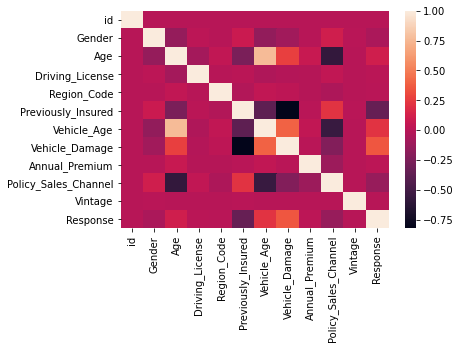

In [30]:
imputer=KNNImputer(n_neighbors=2)
a=imputer.fit_transform(train[['Driving_License']])
b=imputer.fit_transform(train[['Policy_Sales_Channel']])
train['Driving_License']=a
train['Policy_Sales_Channel']=b
#KNN算法填充缺失值
print(train)
corr=train.corr()
corr=(corr)
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

train.isnull().any()

In [31]:
x=train.loc[:,'Age':'Vintage']
print(x)
y=train.loc[:,'Response']
print(y)

        Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage
0        27              1.0         46.0                   1            0               0         33138.0                 152.0      223
1        44              1.0         28.0                   0            2               1         60529.0                  26.0      158
2        52              1.0         46.0                   0            2               1         22476.0                 124.0      226
3        23              1.0         46.0                   1            0               0          2630.0                 152.0      163
4        43              1.0         28.0                   0            1               1         32543.0                 124.0       56
...     ...              ...          ...                 ...          ...             ...             ...                   ...      ...
304883   20              1.0      

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
CLF=RandomForestClassifier(n_jobs=2)
CLF.fit(x_train,y_train)

RandomForestClassifier(n_jobs=2)

In [33]:
test=pd.read_csv("train.csv")
test['Gender']=test.Gender.map({'Male':0,'Female':1})
test['Vehicle_Age']=test.Vehicle_Age.map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test['Vehicle_Damage']=test.Vehicle_Damage.map({'No':0,'Yes':1})

In [34]:
test_imputer=KNNImputer(n_neighbors=2)
a=test_imputer.fit_transform(test[['Driving_License']])
b=test_imputer.fit_transform(test[['Policy_Sales_Channel']])
test['Driving_License']=a
test['Policy_Sales_Channel']=b

In [35]:
#x_test=test.loc[:,'Age':'Vintage']
np.set_printoptions(threshold=np.inf)

In [36]:
print(CLF.predict_proba(x_test))
CLF.score(x_test,y_test)

[[0.76       0.24      ]
 [1.         0.        ]
 [0.69       0.31      ]
 [1.         0.        ]
 [0.76       0.24      ]
 [1.         0.        ]
 [0.83       0.17      ]
 [0.68       0.32      ]
 [0.58       0.42      ]
 [1.         0.        ]
 [0.91       0.09      ]
 [1.         0.        ]
 [0.71       0.29      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.81       0.19      ]
 [0.82       0.18      ]
 [0.99       0.01      ]
 [1.         0.        ]
 [0.85       0.15      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.67       0.33      ]
 [0.92       0.08      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.94       0.06      ]
 [1.         0.        ]
 [0.97       0.03      ]
 [0.84       0.16      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.44       0.56      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.94       0.06      ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.5        0.5       ]


0.8653612778379087